In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/data_2.csv', low_memory=False)

In [ ]:
data_crop = data[['Participant Private ID', 'Screen Name', 'Trial Number', 'Response', 'Player1', 'Player2', 'Player3', 'display']].dropna()
clean = data_crop[data_crop["Response"].str.contains("s")== False ]
clean = clean[clean["display"].str.contains("T")== False ]
clean.tail(40)

Participant Private ID Screen Name Trial Number Response  Player1  \
17985               7103065.0    Screen 1            1        2      1.0   
17987               7103065.0    Screen 3            1       No      1.0   
17991               7103065.0    Screen 1            2        3      6.0   
17993               7103065.0    Screen 3            2       No      6.0   
17997               7103065.0    Screen 1            3        3      1.0   
17999               7103065.0    Screen 3            3       No      1.0   
18003               7103065.0    Screen 1            4        2      2.0   
18005               7103065.0    Screen 3            4       No      2.0   
18009               7103065.0    Screen 1            5        1      6.0   
18011               7103065.0    Screen 3            5       No      6.0   
18015               7103065.0    Screen 1            6        2      2.0   
18017               7103065.0    Screen 3            6       No      2.0   
18021               7103065.0    Screen 1            7        2      2.0   
18023               7103065.0    Screen 3            7       No      2.0   
18027               7103065.0    Screen 1            8        2      2.0   
18029               7103065.0    Screen 3            8       No      2.0   
18033               7103065.0    Screen 1            9        2      3.0   
18035               7103065.0    Screen 3            9       No      3.0   
18039               7103065.0    Screen 1           10        2      6.0   
18041               7103065.0    Screen 3           10       No      6.0   
18045               7103065.0    Screen 1            1        2      3.0   
18047               7103065.0    Screen 3            1       No      3.0   
18051               7103065.0    Screen 1            2        2      1.0   
18053               7103065.0    Screen 3            2       No      1.0   
18057               7103065.0    Screen 1            3        2      6.0   
18059               7103065.0    Screen 3            3       No      6.0   
18063               7103065.0    Screen 1            4        2      0.0   
18065               7103065.0    Screen 3            4       No      0.0   
18069               7103065.0    Screen 1            5        2      2.0   
18071               7103065.0    Screen 3            5       No      2.0   
18075               7103065.0    Screen 1            6        2      3.0   
18077               7103065.0    Screen 3            6       No      3.0   
18081               7103065.0    Screen 1            7        2      2.0   
18083               7103065.0    Screen 3            7       No      2.0   
18087               7103065.0    Screen 1            8        2      3.0   
18089               7103065.0    Screen 3            8       No      3.0   
18093               7103065.0    Screen 1            9        2      3.0   
18095               7103065.0    Screen 3            9       No      3.0   
18099               7103065.0    Screen 1           10        2      2.0   
18101               7103065.0    Screen 3           10       No      2.0   

       Player2  Player3            display  
17985      5.0      3.0  punishment_trials  
17987      5.0      3.0  punishment_trials  
17991      3.0      4.0  punishment_trials  
17993      3.0      4.0  punishment_trials  
17997      1.0      6.0  punishment_trials  
17999      1.0      6.0  punishment_trials  
18003      2.0      6.0  punishment_trials  
18005      2.0      6.0  punishment_trials  
18009      6.0      0.0  punishment_trials  
18011      6.0      0.0  punishment_trials  
18015      1.0      1.0  punishment_trials  
18017      1.0      1.0  punishment_trials  
18021      3.0      2.0  punishment_trials  
18023      3.0      2.0  punishment_trials  
18027      1.0      6.0  punishment_trials  
18029      1.0      6.0  punishment_trials  
18033      2.0      2.0  punishment_trials  
18035      2.0      2.0  punishment_trials  
18039      2.0      0.0  punishment

In [ ]:
import statistics

reward_trials = clean.loc[lambda clean: clean['display'] == 'reward_trials']
punishment_trials = clean.loc[lambda clean: clean['display'] == 'punishment_trials']
reward_punishment = clean.loc[lambda clean: clean['display'] == 'reward_punishment']

spisok_r_p = reward_punishment['Participant Private ID'].unique()
spisok_r = reward_trials['Participant Private ID'].unique()
spisok_p = punishment_trials['Participant Private ID'].unique()

In [ ]:
pun_np_true = []
pun_np_false = []
rew_np_true = []
rew_np_false = []
spisok_players_rp_sr = []

for i in spisok_r_p:
  spisok_sr = []
  spisok_nagr_true = []
  spisok_nagr_false = []
  spisok_nak_true = []
  spisok_nak_false = []
  player = reward_punishment[reward_punishment['Participant Private ID'] == i]

  for i in range(1, len(player['Response'])):
    if 'P' in player.iloc[i-1]['Response']:
      spisok_sr.append(int(player.iloc[i]['Response']))

    if player.iloc[i]['Screen Name'] == 'Screen 4' or player.iloc[i]['Screen Name'] == 'Screen 5':

      if player.iloc[i]['Response'] == "Player 1":
        if int(player.iloc[i]['Player1']) >= 4:
          spisok_nagr_true.append(int(player.iloc[i+1]['Response']))
        else:
          spisok_nagr_false.append(int(player.iloc[i+1]['Response']))

      if player.iloc[i]['Response'] == "Player 2":
        if int(player.iloc[i]['Player2']) >= 4:
          spisok_nagr_true.append(int(player.iloc[i+1]['Response']))
        else:
          spisok_nagr_false.append(int(player.iloc[i+1]['Response']))

      if player.iloc[i]['Response'] == "Player 3":
        if int(player.iloc[i]['Player3']) >= 4:
          spisok_nagr_true.append(int(player.iloc[i+1]['Response']))
        else:
          spisok_nagr_false.append(int(player.iloc[i+1]['Response']))


    if player.iloc[i]['Screen Name'] == 'Screen 9':

      if player.iloc[i]['Response'] == "Player 1":
        if int(player.iloc[i]['Player1']) <= 1:
          spisok_nak_true.append(int(player.iloc[i+1]['Response']))
        else:
          spisok_nak_false.append(int(player.iloc[i+1]['Response']))

      if player.iloc[i]['Response'] == "Player 2":
        if int(player.iloc[i]['Player2']) <= 1:
          spisok_nak_true.append(int(player.iloc[i+1]['Response']))
        else:
          spisok_nak_false.append(int(player.iloc[i+1]['Response']))

      if player.iloc[i]['Response'] == "Player 3":
        if int(player.iloc[i]['Player3']) <= 1:
          spisok_nak_true.append(int(player.iloc[i+1]['Response']))
        else:
          spisok_nak_false.append(int(player.iloc[i+1]['Response']))

  if len(spisok_sr) > 0:
    player_sr = sum(spisok_sr) / len(spisok_sr)
    spisok_players_rp_sr.append(player_sr)
  else:
    spisok_players_rp_sr.append(0)
  pun_np_true.append(len(spisok_nak_true))
  pun_np_false.append(len(spisok_nak_false))
  rew_np_true.append(len(spisok_nagr_true))
  rew_np_false.append(len(spisok_nagr_false))

In [ ]:
spisok_players_p_sr = []
pun_true = []
pun_false = []

for i in spisok_p:
  spisok_sr = []
  spisok_pun_true = []
  spisok_pun_false = []
  player = punishment_trials[punishment_trials['Participant Private ID'] == i]

  for i in range(1, len(player['Response'])):
    if 'P' in player.iloc[i-1]['Response']:
      spisok_sr.append(int(player.iloc[i]['Response']))

    if player.iloc[i]['Response'] == "Player 1":
      if int(player.iloc[i]['Player1']) <= 1:
        spisok_pun_true.append(int(player.iloc[i+1]['Response']))
      else:
        spisok_pun_false.append(int(player.iloc[i+1]['Response']))

    if player.iloc[i]['Response'] == "Player 2":
      if int(player.iloc[i]['Player2']) <= 1:
        spisok_pun_true.append(int(player.iloc[i+1]['Response']))
      else:
        spisok_pun_false.append(int(player.iloc[i+1]['Response']))

    if player.iloc[i]['Response'] == "Player 3":
      if int(player.iloc[i]['Player3']) <= 1:
        spisok_pun_true.append(int(player.iloc[i+1]['Response']))
      else:
        spisok_pun_false.append(int(player.iloc[i+1]['Response']))

  if len(spisok_sr) > 0:
    player_sr = sum(spisok_sr) / len(spisok_sr)
    spisok_players_p_sr.append(player_sr)
  else:
    spisok_players_p_sr.append(0)
  pun_true.append(len(spisok_pun_true))
  pun_false.append(len(spisok_pun_false))

In [ ]:
spisok_players_r_sr = []
nagr_true = []
nagr_false = []

for i in spisok_r:
  spisok_sr = []
  spisok_nagr_true = []
  spisok_nagr_false = []
  player = reward_trials[reward_trials['Participant Private ID'] == i]

  for i in range(1, len(player['Response'])):
    if 'P' in player.iloc[i-1]['Response']:
      spisok_sr.append(int(player.iloc[i]['Response']))

    if player.iloc[i]['Response'] == "Player 1":
      if int(player.iloc[i]['Player1']) >= 4:
        spisok_nagr_true.append(int(player.iloc[i+1]['Response']))
      else:
        spisok_nagr_false.append(int(player.iloc[i+1]['Response']))

    if player.iloc[i]['Response'] == "Player 2":
      if int(player.iloc[i]['Player2']) >= 4:
        spisok_nagr_true.append(int(player.iloc[i+1]['Response']))
      else:
        spisok_nagr_false.append(int(player.iloc[i+1]['Response']))

    if player.iloc[i]['Response'] == "Player 3":
      if int(player.iloc[i]['Player3']) >= 4:
        spisok_nagr_true.append(int(player.iloc[i+1]['Response']))
      else:
        spisok_nagr_false.append(int(player.iloc[i+1]['Response']))

  if len(spisok_sr) > 0:
    player_sr = sum(spisok_sr) / len(spisok_sr)
    spisok_players_r_sr.append(player_sr)
  else:
    spisok_players_r_sr.append(0)
  nagr_true.append(len(spisok_nagr_true))
  nagr_false.append(len(spisok_nagr_false))

In [ ]:
finale_dict = {'Private Id': clean['Participant Private ID'].unique(), 'Среднее наказания': spisok_players_p_sr, 'Среднее поощерния': spisok_players_r_sr,
              'Среднее наказания + поощрения': spisok_players_rp_sr,'Наказания правильные': pun_true, 'Наказания неправильные': pun_false, 'Поощрения правильные': nagr_true,
              'Поощрения неправильные': nagr_false, 'Н+П Наказания правильные': pun_np_true,
              'Н+П Наказания неправильные': pun_np_false, 'Н+П Поощрения правильные': rew_np_true, 'Н+П Поощрения неправильные': rew_np_false}
final_table = pd.DataFrame(data=finale_dict)
data_nap = pd.read_csv('/content/PGG_Результаты - Лист3 (1).csv', decimal = ',')
data_nap = data_nap.drop(['Public id'], axis=1)
data_nap = data_nap.drop(['Private id'], axis=1)
table_joined = final_table.join(data_nap, how='outer')
data_nap

Trials Средний ответ    Trials Дифференциальный ответ   \
0                     2.4                             -1.2   
1                     5.4                              2.1   
2                     1.9                             -1.3   
3                     3.9                              0.7   
4                     6.0                              2.8   
..                    ...                              ...   
57                    3.1                             -0.2   
58                    6.0                              2.8   
59                    4.9                              2.0   
60                    2.2                             -1.0   
61                    3.1                             -0.1   

    Reward Средний ответ   Punishment Средний ответ  R+P Средний ответ  
0                     1.0                       2.3                1.0  
1                     5.8                       6.0                6.0  
2                     2.5                       2.2                2.5  
3                     2.8                       3.3                2.8  
4                     6.0                       6.0                6.0  
..                    ...                       ...                ...  
57                    4.0                       3.7                3.9  
58                    6.0                       6.0                6.0  
59                    5.6                       6.0                6.0  
60                    3.8                       5.6                4.8  
61                    2.0                       2.1                2.0  

[62 rows x 5 columns]

### Предсказание trials average  

In [ ]:
from sklearn.preprocessing import StandardScaler

df_opros = pd.read_excel('/content/triada_empathy_tolerance.xlsx').dropna().drop(['Participant Private ID', 'Unnamed: 0'], axis=1)
df_opros
df_demogr = pd.read_csv('/content/a6tf.csv', low_memory=False).dropna().drop(['Participant Private ID', 'Participant Public ID'], axis=1)
table_prizn = pd.concat([df_opros, df_demogr], axis=1)
target_col = data_nap["Trials Средний ответ "]
table_prizn['target'] = target_col
table_prizn_scaled = table_prizn.dropna().drop(['target', 'Tolerance to uncertainty', 'Intolerance to uncertainty'], axis=1)
table_ans = table_prizn.dropna()['target']

scaler = StandardScaler()
scaler.fit(table_prizn_scaled)
table = scaler.transform(table_prizn_scaled)
table_prizn_scaled

Machiavellianism  Psychopathy  Narcissism  Perspective-taking scale  \
0                 11           18          14                        25   
1                 20            7          15                        14   
2                 15           17          14                        25   
3                 11            5          15                        22   
4                  8            8          11                        25   
..               ...          ...         ...                       ...   
57                 7            9           9                        26   
58                14            4          20                        29   
59                16           10          19                        19   
60                10            7          15                        29   
61                20            7          20                        16   

    Fantasy scale  Empathic concern scale  Personal distress scale  \
0              23                      22                       16   
1              31                      20                       15   
2              30                      11                       15   
3              35                      27                       24   
4              34                      34                       28   
..            ...                     ...                      ...   
57             19                      30                       31   
58             24                      16                       19   
59             27                      24                       26   
60             30                      27                       16   
61             21                      19                       20   

    Interpersonal intolerance to uncertainty  genderRU-quantised  DoBRU-year  \
0                                         37                 2.0        20.0   
1                                         25                 2.0        28.0   
2                                         34                 2.0        19.0   
3                                         46                 2.0        21.0   
4                                         41                 2.0        20.0   
..                                       ...                 ...         ...   
57                                        45                 2.0        22.0   
58                                        42                 2.0        20.0   
59                                        34                 2.0        24.0   
60                                        36                 2.0        18.0   
61                                        42                 1.0        33.0   

    educationRU-quantised  
0                     3.0  
1                     5.0  
2                     5.0  
3                     4.0  
4                     3.0  
..                    ...  
57                    6.0  
58                    5.0  
59                    7.0  
60                    3.0  
61                    5.0  

[61 rows x 11 columns]

In [ ]:
table_prizn.describe()

Machiavellianism  Psychopathy  Narcissism  Perspective-taking scale  \
count         62.000000    62.000000   62.000000                 62.000000   
mean          11.387097     8.516129   13.806452                 24.096774   
std            4.293933     4.124067    3.434820                  5.098086   
min            4.000000     4.000000    6.000000                  8.000000   
25%            8.000000     5.000000   12.000000                 21.250000   
50%           11.000000     7.000000   14.000000                 25.000000   
75%           14.000000    11.000000   16.000000                 27.750000   
max           20.000000    20.000000   20.000000                 33.000000   

       Fantasy scale  Empathic concern scale  Personal distress scale  \
count      62.000000               62.000000                62.000000   
mean       25.112903               23.193548                22.048387   
std         5.691826                5.636063                 5.511322   
min         7.000000                7.000000                 7.000000   
25%        22.250000               20.250000                19.000000   
50%        26.500000               24.000000                21.500000   
75%        29.000000               27.000000                26.000000   
max        35.000000               35.000000                31.000000   

       Tolerance to uncertainty  Intolerance to uncertainty  \
count                 62.000000                   62.000000   
mean                  59.338710                   56.161290   
std                    7.135558                   11.409219   
min                   43.000000                   22.000000   
25%                   55.000000                   49.250000   
50%                   59.500000                   58.000000   
75%                   63.750000                   65.750000   
max                   74.000000                   77.000000   

       Interpersonal intolerance to uncertainty  genderRU-quantised  \
count                                 62.000000           61.000000   
mean                                  36.483871            1.770492   
std                                    5.676359            0.424006   
min                                   25.000000            1.000000   
25%                                   33.250000            2.000000   
50%                                   37.000000            2.000000   
75%                                   41.000000            2.000000   
max                                   47.000000            2.000000   

       DoBRU-year  educationRU-quantised     target  
count   61.000000              61.000000  62.000000  
mean    19.819672               4.278689   3.627419  
std      3.057822               1.279728   1.272814  
min     18.000000               3.000000   0.000000  
25%     18.000000               3.000000   3.025000  
50%     19.000000               5.000000   3.850000  
75%     20.000000               5.000000   4.300000  
max     33.000000               7.000000   6.000000

In [ ]:
table_prizn['genderRU-quantised'].value_counts()

2.0    47
1.0    14
Name: genderRU-quantised, dtype: int64

<Axes: >

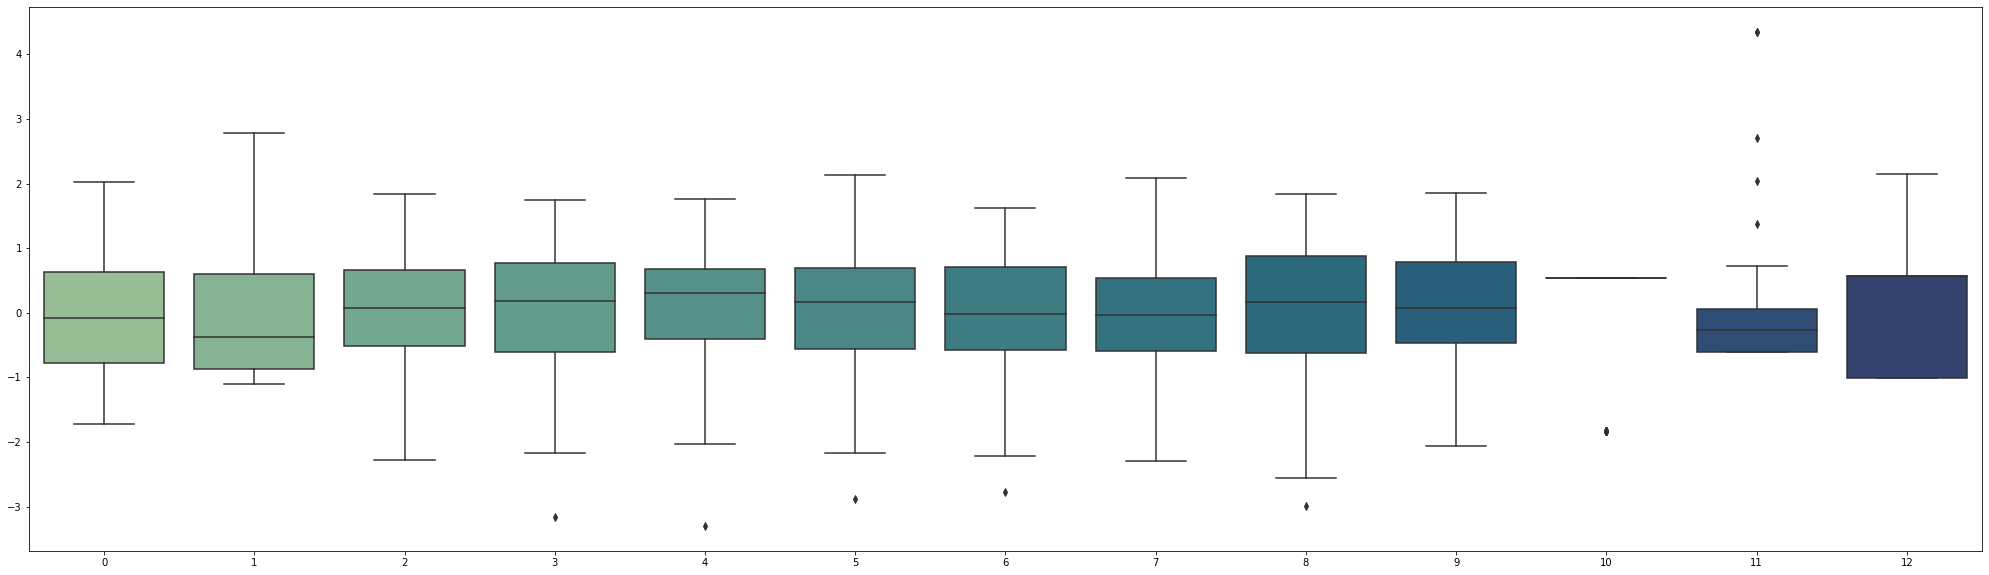

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 10))
sns.boxplot(data=table, palette="crest")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = table
y = table_ans.to_numpy()

y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
score = mean_squared_error(y_test, y_pred)

forest = RandomForestRegressor(max_depth=1, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
score_f = mean_squared_error(y_test, y_pred_forest)
importances = forest.feature_importances_

r2_reg = r2_score(y_test, y_pred)
r2_for = r2_score(y_test, y_pred_forest)

print('r2_reg:', r2_reg)
print('r2_for:', r2_for)
print('imp:', importances)

print('MSE for regression: ', score)
print('MSe for RF: ', score_f)

#print(pd.DataFrame(y_pred))
#print(pd.DataFrame(y_pred_forest))

r2_reg: -0.4109498182383926
r2_for: -0.13953356192930588
imp: [0.04 0.09 0.09 0.43 0.14 0.09 0.03 0.04 0.02 0.02 0.01]
MSE for regression:  2.628653835148442
MSe for RF:  2.122994899695099


<ipython-input-142-918b60646785>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
